In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import special

In [2]:
#functions
def bisectionDriver(f,tol,a,b):

    [astar,ier,count] = bisection(f,a,b,tol)
    print('the approximate root is',astar)
    print('the error message reads:',ier)
    print('f(astar) =', f(astar))
    print('number of iterations:', count)

def bisection(f,a,b,tol):
    
#    Inputs:
#     f,a,b       - function and endpoints of initial interval
#      tol  - bisection stops when interval length < tol

#    Returns:
#      astar - approximation of root
#      ier   - error message
#            - ier = 1 => Failed
#            - ier = 0 == success

#     first verify there is a root we can find in the interval 

    fa = f(a)
    fb = f(b);
    if (fa*fb>0):
        ier = 1
        astar = a
        return [astar, ier, count]

#   verify end points are not a root 
    if (fa == 0):
        astar = a
        ier =0
        return [astar, ier, count]

    if (fb ==0):
        astar = b
        ier = 0
        return [astar, ier, count]

    count = 0
    d = 0.5*(a+b)
    while (abs(d-a)> tol):
        fd = f(d)
        if (fd ==0):
            astar = d
            ier = 0
            return [astar, ier, count]
        if (fa*fd<0):
            b = d
        else:
            a = d
            fa = fd
        d = 0.5*(a+b)
        count = count +1
      
    astar = d
    ier = 0
    return [astar, ier, count]


def newtonDriver(f, fp, p0, tol, Nmax):
    
    (p,pstar,info,it,er_newt) = newton(f,fp,p0,tol,Nmax)
    
    print('the approximate root is', '%16.16e' % pstar)
    print('the error message reads:', '%d' % info)
    print('Number of iterations:', '%d' % it)
    
def newton(f,fp,p0,tol,Nmax):
    """
    Newton iteration.
    Inputs:
    f,fp - function and derivative
    p0 - initial guess for root
    tol - iteration stops when p_n,p_{n+1} are within tol
    Nmax - max number of iterations
    Returns:
    p - an array of the iterates
    pstar - the last iterate
    info - success message
    - 0 if we met tol
    - 1 if we hit Nmax iterations (fail)
    """
    p = np.zeros(Nmax+1);
    er_newt = []
    #p[0] = p0
    
    for it in range(Nmax):
        p1 = p0-f(p0)/fp(p0) #root of tangent line
        p[it] = p1
        er_newt.append(abs(p1-p0))
        
        if (abs(p1-p0) < tol):
            pstar = p1
            info = 0
            return [p,pstar,info,it+1,er_newt]
        p0 = p1 #reset for next iteration

    pstar = p1
    info = 1
    return [p,pstar,info,it,er_newt]



def secantDriver(f,a,b,tol,Nmax):

    [p,star,ier,count, er_sec] = secant(f,a,b,tol,Nmax)
    print('the approximate root is',star)
    print('the error message reads:',ier)
    print('f(astar) =', f(star))
    print('number of iterations:', count)

def secant(f,a,b,tol,Nmax):

#     first verify there is a root we can find in the interval 
    count = 0
    er_sec = []
    #er_sec.append(abs(a-b))
    p = np.zeros(Nmax+1); 
    p[0] = b
    
    if abs(f(a)) == 0:
        star = a
        ier = 0
        return [p, star, ier, count, er_sec]
    
    fa = f(a)
    fb = f(b)
    
    for i in range(1,Nmax):
        if abs(fa-fb) == 0:
            ier = 1
            star = b
            return [p, star, ier, i, er_sec]
        
        c = b - (fb*(b-a))/(fb - fa)
        er_sec.append(c-b)
        p[i] = c
        
        if abs(c-b) < tol:
            star = c
            ier = 0
            
            return [p, star, ier, i, er_sec]
        
        a = b
        fa = fb
        b = c
        fb = f(c)
        count = i
        
    star = c
    ier = 1
        
    return [p, star, ier, count, er_sec]

## Problem 1
### a)

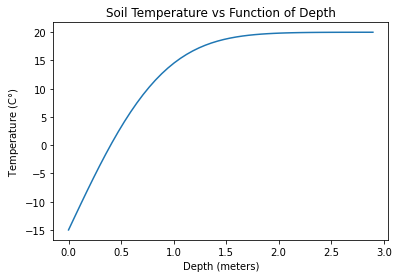

In [3]:
x0 = np.arange(0, 5, 0.1)
x = x0/(2*math.sqrt((0.138*(10**(-6)))*5184000))
f = 35*special.erf(x) -15
plt.title("Soil Temperature vs Function of Depth")
plt.xlabel("Depth (meters)")
plt.ylabel("Temperature (C$ \degree $)")
plt.plot(x,f)
plt.show()

### b)

In [4]:
f = lambda x: 35*special.erf(x) -15
a = 0
b = 2.89663681
tol = 10*(-13)

bisectionDriver(f,a,b,tol)

the approximate root is 0.40018624979326534
the error message reads: 0
f(astar) = 0.0
number of iterations: 59


### c)

In [8]:
f = lambda x: 35*special.erf(x) -15
fp = lambda x: (70*np.exp(-(x/(2*math.sqrt(alpha*t)))**2))/math.sqrt(np.pi)
p0 = 0.01
Nmax = 100
tol = 10**(-13)
alpha = (0.138*(10**(-6)))
t = 5184000
newtonDriver(f, fp, p0, tol, Nmax)

the approximate root is 4.0018624979326362e-01
the error message reads: 0
Number of iterations: 14


In [9]:
#if p0 = 2.89663681 (x bar), we divide by zero from evaluating the derivative 
p0 = 2.89663681
newtonDriver(f, fp, p0, tol, Nmax)

the approximate root is              nan
the error message reads: 1
Number of iterations: 99


/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_6647/3584547364.py:91: RuntimeWarning: divide by zero encountered in double_scalars
  p1 = p0-f(p0)/fp(p0) #root of tangent line
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_6647/3584547364.py:91: RuntimeWarning: invalid value encountered in double_scalars
  p1 = p0-f(p0)/fp(p0) #root of tangent line


## Problem 5

In [10]:
def newtonDriver(f, fp, p0, tol, Nmax):
    
    (p,pstar,info,it,er_newt) = newton(f,fp,p0,tol,Nmax)
    
    print('the approximate root is', '%16.16e' % pstar)
    print('the error message reads:', '%d' % info)
    print('Number of iterations:', '%d' % it)
    return p, er_newt

def secantDriver(f,a,b,tol,Nmax):

    [p, star,ier,count, er_sec] = secant(f,a,b,tol,Nmax)
    print('the approximate root is',star)
    print('the error message reads:',ier)
    print('f(astar) =', f(star))
    print('number of iterations:', count)
    return p, er_sec

In [11]:
#newton
f = lambda x: x**6 - x - 1
fp = lambda x: 6*x**5 - 1
p0 = 2
Nmax = 10
tol = 10**(-13)
p_newt,er_newt = newtonDriver(f, fp, p0, tol, Nmax)

the approximate root is 1.1347241384015194e+00
the error message reads: 0
Number of iterations: 9


In [12]:
#secant
a = 2
b = 1
p_sec,er_sec = secantDriver(f,a,b,tol,Nmax)

the approximate root is 1.1347241384015194
the error message reads: 0
f(astar) = -8.881784197001252e-16
number of iterations: 9


### a)

In [13]:
from tabulate import tabulate

print("The following is a table of the error in each step of the iteration for Newton's method and Secant method:\n")
er_newt.insert(0,"Newton")
er_sec.insert(0,"Secant")
data = [er_newt, er_sec]

print(tabulate(data,tablefmt="grid"))
er_newt = er_newt[1:]
er_sec = er_sec[1:]

print("\nError decreases as expected, and stops when desired tolerance is reached.")

The following is a table of the error in each step of the iteration for Newton's method and Secant method:

+--------+----------+----------+------------+-----------+------------+--------------+-------------+-------------+--------------+
| Newton | 0.319372 | 0.249889 |  0.175768  | 0.0934325 | 0.0251852  |  0.00162275  | 6.38984e-06 | 9.87017e-11 |  0           |
+--------+----------+----------+------------+-----------+------------+--------------+-------------+-------------+--------------+
| Secant | 0.016129 | 0.174449 | -0.0729219 | 0.0148757 | 0.00228526 | -9.31621e-05 | 4.92343e-07 | 1.10304e-10 | -2.22045e-16 |
+--------+----------+----------+------------+-----------+------------+--------------+-------------+-------------+--------------+

Error decreases as expected, and stops when desired tolerance is reached.


### b)

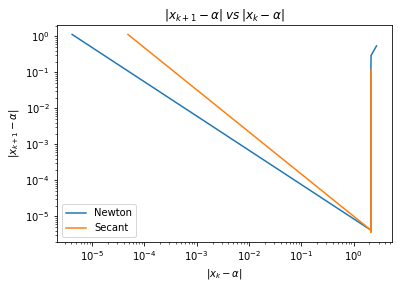

In [14]:
alpha = 1.13472
y = []
x = abs(p_newt - alpha)
for i in range (len(p_newt)): 
    p1 = x[i] - (f(x[i])/fp(x[i])) #x_k+1
    y.append(abs(p1 - alpha)) 

plt.plot(y[:len(y)],x[:len(x)], label = "Newton")

y = []
x = abs(p_sec - alpha)

for i in range (1,len(x)): 
    p1 = x[i] - (f(x[i])*(x[i] - x[i-1]))/(f(x[i]) - f(x[i-1])) #x_k+1
    y.append(abs(p1 - alpha))

plt.plot(y[:len(y)],x[1:len(x)], label = "Secant")

plt.legend()

plt.title(r"$|x_{k+1} - \alpha |\: vs\: |x_{k} - \alpha |$")
plt.ylabel(r"$|x_{k+1} - \alpha |$")
plt.xlabel(r"$|x_{k} - \alpha |$")
plt.yscale("log")
plt.xscale("log")


plt.show()